# Positive selection primer design

This notebook takes positive selection dataframe and designs NNS primers for each position

In [1]:
import pandas as pd
from plotnine import *
from Bio.SeqUtils import MeltingTemp as mt
import statistics

In [ ]:
reference_lookup = snakemake.input.reference_lookup
positive_sel_df = snakemake.input.positive_sel_df
create_primers_srcipt = snakemake.input.create_primers_srcipt
spike_extended = snakemake.input.spike_extended

full_legth_spike_primers_NNG = snakemake.output.full_legth_spike_primers_NNG
full_legth_spike_primers_NNC = snakemake.output.full_legth_spike_primers_NNC
PS_legth_spike_primer_df_NNG_out = snakemake.output.PS_legth_spike_primer_df_NNG_out
PS_legth_spike_primer_df_NNC_out = snakemake.output.PS_legth_spike_primer_df_NNC_out
PS_legth_spike_primer_df_out = snakemake.output.PS_legth_spike_primer_df_out

In [ ]:
reference_lookup = pd.read_csv(reference_lookup)
positive_sel_df = pd.read_csv(positive_sel_df)

In [2]:
# reference_lookup = pd.read_csv("../reference_sequences/reference_sequence_position_lookup.csv")
# positive_sel_df = pd.read_csv("../results/spike_positive_selection_sites.csv")
# create_primers_srcipt = '../scripts/2021Jan_create_primers.py'
# spike_extended = "../reference_sequences/B16172_extended_ends_for_primers.txt"

# full_legth_spike_primers_NNG = '../results/primers/FULL_LENGTH_Spike_primer_positive_selection_NNG.csv'
# full_legth_spike_primers_NNC = '../results/primers/FULL_LENGTH_Spike_primer_positive_selection_NNC.csv'
# PS_legth_spike_primer_df_NNG_out = '../results/primers/Positive_selection_site_primers_NNG.csv'
# PS_legth_spike_primer_df_NNC_out = '../results/primers/Positive_selection_site_primers_NNC.csv'
# PS_legth_spike_primer_df_out = '../results/primers/Positive_selection_site_primers_all.csv'

In [3]:
#merge lookup and positive selection site tables
#remove mutations that are in variant spike already
new_positive_sel_df = pd.merge(positive_sel_df,
                  reference_lookup,
                  how='left',
                  left_on=['site'],
                  right_on = ['parent_pos'],
                  indicator=True)

In [4]:
#now merge tables just on parent position
new_positive_sel_df = pd.merge(positive_sel_df,
                  reference_lookup,
                  how='left',
                  left_on=['site'],
                  right_on = ['parent_pos'])

new_positive_sel_df = new_positive_sel_df.sort_values(by=['site'],ignore_index=True)
#drop missing sites, this removes +ve selection sites that are in CTD or in missing positions in the variant
new_positive_sel_df = new_positive_sel_df[new_positive_sel_df['variant_pos'].notna()]


In [5]:
new_positive_sel_df = new_positive_sel_df[['variant_pos','variant_seq','n_time_windows', 'p']]

## Design primers

### NNG primers

In [6]:
# run primer design script
!python {create_primers_srcipt} \
    {spike_extended} \
    positiveSelectionSpike_NNG \
    1 \
    {full_legth_spike_primers_NNG} \
    --ambiguous_codon NNG \
    --minprimertm 60.5 \
    --output opools \
    --maxprimertm 61.5

Read the following command line arguments
	sequencefile = ../reference_sequences/B16172_extended_ends_for_primers.txt
	primerprefix = positiveSelectionSpike_NNG
	firstcodon = 1
	outfile = ../results/primers/FULL_LENGTH_Spike_primer_positive_selection_NNG.csv
	startprimerlength = 37
	maxprimertm = 61.5
	minprimertm = 60.5
	minlength = 25
	maxlength = 51
	ambiguous_codon = NNG
	output = opools
Read a sequence of length 3842 from ../reference_sequences/B16172_extended_ends_for_primers.txt:
cagccgagccacatcgctcaacgcgtgccaccATGTTTGTGTTCCTGGTGCTGCTGCCACTGGTGTCCAGCCAGTGTGTGAACCTGAGAACCAGGACCCAACTTCCTCCTGCCTACACCAACTCCTTCACCAGGGGAGTCTACTACCCTGACAAGGTGTTCAGGTCCTCTGTGCTGCACAGCACCCAGGACCTGTTCCTGCCATTCTTCAGCAATGTGACCTGGTTCCATGCCATCCATGTGTCTGGCACCAATGGCACCAAGAGGTTTGACAACCCTGTGCTGCCATTCAATGATGGAGTCTACTTTGCCAGCACAGAGAAGAGCAACATCATCAGGGGCTGGATTTTTGGCACCACCCTGGACAGCAAGACCCAGTCCCTGCTGATTGTGAACAATGCCACCAATGTGGTGATTAAGGTGTGTGAGTTCCAGTTCTGTAATGACCCATTCCTGGACGTCTACTACCACAAGAACAACAAGTCCTGGATGGAGTCTGGAGTCTACTC

In [9]:
#import primer table
full_legth_spike_primer_df = pd.read_csv(full_legth_spike_primers_NNG)

Extract site from primer name

In [10]:
full_legth_spike_primer_df['site'] = full_legth_spike_primer_df['Primer name'].str.extract('(\d+)')
full_legth_spike_primer_df['site'] = full_legth_spike_primer_df['site'].astype(float)

Now merge `new_positive_sel_df` with primer table so you only take primers used for positively aelected sites

In [11]:
#now merge tables just on parent position
PS_legth_spike_primer_df_NNG = pd.merge(new_positive_sel_df,
                  full_legth_spike_primer_df,
                  how='left',
                  left_on=['variant_pos'],
                  right_on = ['site'])

In [12]:
PS_legth_spike_primer_df_NNG.to_csv(PS_legth_spike_primer_df_NNG_out, index=False) 

### NNC primers

In [13]:
# run primer design script
!python {create_primers_srcipt} \
    {spike_extended} \
    positiveSelectionSpike_NNC \
    1 \
    {full_legth_spike_primers_NNC} \
    --ambiguous_codon NNC \
    --minprimertm 60.5 \
    --output opools \
    --maxprimertm 61.5

Read the following command line arguments
	sequencefile = ../reference_sequences/B16172_extended_ends_for_primers.txt
	primerprefix = positiveSelectionSpike_NNC
	firstcodon = 1
	outfile = ../results/primers/FULL_LENGTH_Spike_primer_positive_selection_NNC.csv
	startprimerlength = 37
	maxprimertm = 61.5
	minprimertm = 60.5
	minlength = 25
	maxlength = 51
	ambiguous_codon = NNC
	output = opools
Read a sequence of length 3842 from ../reference_sequences/B16172_extended_ends_for_primers.txt:
cagccgagccacatcgctcaacgcgtgccaccATGTTTGTGTTCCTGGTGCTGCTGCCACTGGTGTCCAGCCAGTGTGTGAACCTGAGAACCAGGACCCAACTTCCTCCTGCCTACACCAACTCCTTCACCAGGGGAGTCTACTACCCTGACAAGGTGTTCAGGTCCTCTGTGCTGCACAGCACCCAGGACCTGTTCCTGCCATTCTTCAGCAATGTGACCTGGTTCCATGCCATCCATGTGTCTGGCACCAATGGCACCAAGAGGTTTGACAACCCTGTGCTGCCATTCAATGATGGAGTCTACTTTGCCAGCACAGAGAAGAGCAACATCATCAGGGGCTGGATTTTTGGCACCACCCTGGACAGCAAGACCCAGTCCCTGCTGATTGTGAACAATGCCACCAATGTGGTGATTAAGGTGTGTGAGTTCCAGTTCTGTAATGACCCATTCCTGGACGTCTACTACCACAAGAACAACAAGTCCTGGATGGAGTCTGGAGTCTACTC

In [14]:
#import primer table
full_legth_spike_primer_df = pd.read_csv(full_legth_spike_primers_NNC)
full_legth_spike_primer_df

,Pool name,Primer name,Ambiguous codon,Sequence
0,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1,NNC,cgcgtgccaccNNCTTTGTGTTCCT
1,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut2,NNC,gtgccaccATGNNCGTGTTCCTGGT
2,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut3,NNC,gccaccATGTTTNNCTTCCTGGTGCTG
3,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut4,NNC,ccATGTTTGTGNNCCTGGTGCTGCTG
4,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut5,NNC,TGTTTGTGTTCNNCGTGCTGCTGCC
...,...,...,...,...
2497,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1247,NNC,taTCAGGAGCCACAGNNACAACAGCCTTTCA
2498,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1248,NNC,attaTCAGGAGCCGNNGGAACAACAGCC
2499,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1249,NNC,gcctcattaTCAGGAGNNACAGGAACAACAGC
2500,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1250,NNC,cgcctcattaTCAGNNGCCACAGGAACAA


In [15]:
full_legth_spike_primer_df['site'] = full_legth_spike_primer_df['Primer name'].str.extract('(\d+)')
full_legth_spike_primer_df['site'] = full_legth_spike_primer_df['site'].astype(float)

In [16]:
#now merge tables just on parent position
PS_legth_spike_primer_df_NNC = pd.merge(new_positive_sel_df,
                  full_legth_spike_primer_df,
                  how='left',
                  left_on=['variant_pos'],
                  right_on = ['site'])

In [17]:
PS_legth_spike_primer_df_NNC.to_csv(PS_legth_spike_primer_df_NNC_out, index=False) 

### Concat NNG and NNC primer tables

In [18]:
frames = [PS_legth_spike_primer_df_NNG, PS_legth_spike_primer_df_NNC]
PS_legth_spike_primer_df = pd.concat(frames)


In [19]:
PS_legth_spike_primer_df = PS_legth_spike_primer_df[['Pool name','Primer name','Sequence']]

In [20]:
PS_legth_spike_primer_df.to_csv(PS_legth_spike_primer_df_out, index=False) 

In [23]:
PS_legth_spike_primer_df

,Pool name,Primer name,Sequence,Tm
0,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut5,TGTTTGTGTTCNNGGTGCTGCTGCC,60.90
1,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut5,GGCAGCAGCACCNNGAACACAAACA,60.90
2,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut12,TGCCACTGGTGNNGAGCCAGTGTGT,62.41
3,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut12,ACACACTGGCTCNNCACCAGTGGCA,62.41
4,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut13,CACTGGTGTCCNNGCAGTGTGTGAAC,60.40
...,...,...,...,...
153,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1217,AGTCCAGCAATGAAGNNCAGCCAGATGTAC,60.93
154,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1226,GGACTGATTGCCATTNNCATGGTGACCATAATG,59.99
155,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1226,CATTATGGTCACCATGNNAATGGCAATCAGTCC,59.99
156,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1250,TTGTTCCTGTGGCNNCTGAtaatgaggcg,60.96


In [24]:
PS_legth_spike_primer_df['Tm'] = PS_legth_spike_primer_df.apply(lambda x: '%0.2f' % mt.Tm_NN(x.Sequence, strict=False), axis=1)
PS_legth_spike_primer_df['Tm'] = PS_legth_spike_primer_df['Tm'].astype('float')
PS_legth_spike_primer_df['length'] = PS_legth_spike_primer_df.apply(lambda x: len(x.Sequence), axis=1)
PS_legth_spike_primer_df

,Pool name,Primer name,Sequence,Tm,length
0,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut5,TGTTTGTGTTCNNGGTGCTGCTGCC,60.90,25
1,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut5,GGCAGCAGCACCNNGAACACAAACA,60.90,25
2,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut12,TGCCACTGGTGNNGAGCCAGTGTGT,62.41,25
3,positiveSelectionSpike_NNG_RevPool,positiveSelectionSpike_NNG-rev-mut12,ACACACTGGCTCNNCACCAGTGGCA,62.41,25
4,positiveSelectionSpike_NNG_ForPool,positiveSelectionSpike_NNG-for-mut13,CACTGGTGTCCNNGCAGTGTGTGAAC,60.40,26
...,...,...,...,...,...
153,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1217,AGTCCAGCAATGAAGNNCAGCCAGATGTAC,60.93,30
154,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1226,GGACTGATTGCCATTNNCATGGTGACCATAATG,59.99,33
155,positiveSelectionSpike_NNC_RevPool,positiveSelectionSpike_NNC-rev-mut1226,CATTATGGTCACCATGNNAATGGCAATCAGTCC,59.99,33
156,positiveSelectionSpike_NNC_ForPool,positiveSelectionSpike_NNC-for-mut1250,TTGTTCCTGTGGCNNCTGAtaatgaggcg,60.96,29


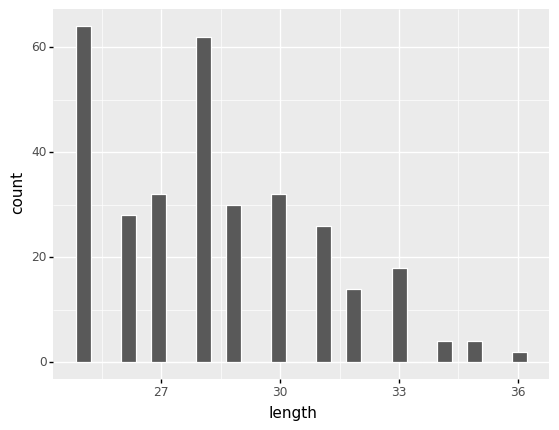

<bound method ggplot.draw of <ggplot: (8735871146722)>>

In [26]:
p = (ggplot(PS_legth_spike_primer_df) + 
     aes('length') + 
     geom_histogram(color='white',bins=30)
    )

p.draw

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


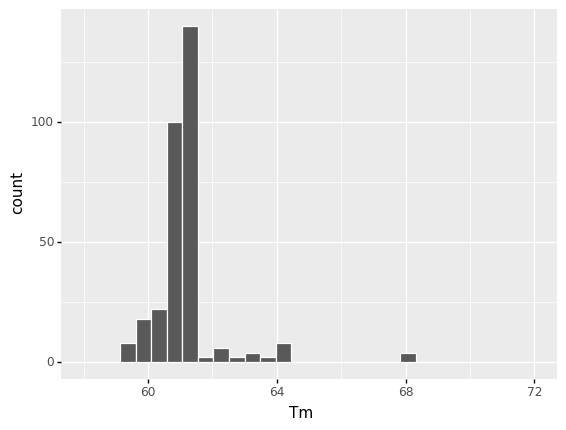

<bound method ggplot.draw of <ggplot: (8735870984572)>>

In [27]:
p = (ggplot(PS_legth_spike_primer_df) + 
     aes('Tm') + 
     geom_histogram(color='white', bins=30)+
     xlim(58,72)
    )

p.draw